<a href="https://colab.research.google.com/github/smatiush/AlgoTradingAnalysis/blob/main/FundingFarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyfolio
!pip install ccxt

In [ ]:
import pandas as pd
import os
import numpy as np
import pyfolio as pf
from datetime import datetime
from datetime import timedelta
import time
from pprint import pprint
import ccxt
import requests
import csv

In [10]:
'''exchange = ccxt.mexc3({'rateLimit' : True})
url = "https://contract.mexc.com/api/v1/contract/detail"
symbolList = []
response = requests.get(url)
data = response.json()
for pairInfo in data['data']:
    symbol = pairInfo['symbol']
    symbolList.append(symbol)
symbolList.sort()
pprint(symbolList)'''
symbolList = [ 
    '1000PAW_USDT',
    '1000SOS_USDT',
    '1INCH_USDT',
    'AAVE_USDT',
    'ACH_USDT',
    'ACS_USDT',
    'ADA_USDT',
    'AGIX_USDT',
    'AGLD_USDT',
    'AIDOGE_USDT',
    'BABYDOGE_USDT',
    'BADGER_USDT',
    'BAKE_USDT',
    'BAL_USDT',
    'BAND_USDT',
    'BAT_USDT',
    'BCH_USDT',
    'BDP_USDT',
    'BEL_USDT',
    'BICO_USDT',
    'BIT_USDT',
    'BLUR_USDT',
    'BLZ_USDT',
    'BNB_USDT',
    'BNT_USDT',
    'BNXNEW_USDT',
    'BOBA_USDT',
    'BOB_USDT',
    'BONE_USDT',
    'BSV_USDT',
    'BSW_USDT',
    'BTC_USD',
    'BTC_USDT',
    'BUSD_USDT',
    'C98_USDT',
    'CAKE_USDT',
    'CANTO_USDT',
    'CAPO_USDT',
    'CAW_USDT',
    'CEEK_USDT',
    'CELO_USDT',
    'CELR_USDT',
    'CEL_USDT',
    'CETUS_USDT',
    'CFX_USDT',
    'CGPT_USDT',
    'CHESS_USDT',
    'JOE_USDT',
    'JST_USDT',
    'KAS_USDT',
    'KAVA_USDT',
    'KDA_USDT',
    'KEY_USDT',
    'KLAY_USDT',
    'KNC_USDT',
    'KSM_USDT',
    'LADYS_USDT',
    'LAZIO_USDT',
    'LDO_USDT',
    'LEVER_USDT',
    'LINA_USDT',
    'LINK_USDT',
    'LIT_USDT',
    'LOKA_USDT',
    'LOOKS_USDT',
    'LOOP_USDT',
    'LPT_USDT',
    'LQTY_USDT',
    'LRC_USDT',
    'LTC_USDT',
    'LUNANEW_USDT',
    'LUNC_USDT',
    'MAGIC_USDT',
    'MANA_USDT',
    'MASK_USDT',]


In [11]:
page_size = 100
page_num = 1
fundingRates = {}
for symbol in symbolList:
    url = "https://contract.mexc.com/api/v1/contract/funding_rate/history?symbol="+ symbol +"&page_num="+str(2)+"&page_size=" + str(page_size)
    response = requests.get(url)
    data = response.json()
    tot_page = data['data']['totalPage']
    fundingRates[symbol] = {}
    for _ in range(tot_page):
        url = "https://contract.mexc.com/api/v1/contract/funding_rate/history?symbol="+ symbol +"&page_num="+str(tot_page)+"&page_size=" + str(page_size)
        response = requests.get(url)
        fundData = response.json()
        #pprint(response.json())
        fundingRawData = fundData['data']['resultList']
        tot_page -= 1
        for finalFundData in fundingRawData:
            fundingRates[symbol][finalFundData['settleTime']] = finalFundData['fundingRate']
            print('------------------------------------------------')
            print('LOKING AT:' + str(finalFundData['settleTime']) + 
                 '\n SYMBOL: '+ symbol +
                 '\n FUNDING: ' + str(finalFundData['fundingRate']))
        time.sleep(0.1)

Streaming output truncated to the last 5000 lines.
------------------------------------------------
LOKING AT:1641168000000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1641139200000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1641110400000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1641081600000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1641052800000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1641024000000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1640995200000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1640966400000
 SYMBOL: MASK_USDT
 FUNDING: 0.0002
------------------------------------------------
LOKING AT:1640937600000
 SYM

In [12]:
fund = fundingRates.copy()
fund
    

{'1000PAW_USDT': {1684310400000: -0.005816,
  1684281600000: 0.003575,
  1684252800000: 0.000441,
  1684224000000: -0.001252,
  1684195200000: 0.002905,
  1684166400000: -0.002022,
  1684137600000: 0.000203,
  1684108800000: -0.004079,
  1684080000000: -0.002089,
  1684051200000: -0.000117,
  1684022400000: -0.002621,
  1683993600000: 0.002622,
  1683964800000: 0.001838,
  1683936000000: -0.000421,
  1683907200000: 0.002496,
  1683878400000: -0.005784,
  1683849600000: 0.001333,
  1683820800000: -0.006203,
  1683792000000: -0.004832,
  1683763200000: -0.00545,
  1683734400000: 0.005764,
  1683705600000: 0.000783,
  1683676800000: 0.000908,
  1683648000000: 0.003454,
  1683619200000: 0.002355,
  1683590400000: 0.001492,
  1683561600000: 0.00018},
 '1000SOS_USDT': {1684310400000: -0.007141,
  1684281600000: -0.003553,
  1684252800000: -0.00233,
  1684224000000: -0.001356,
  1684195200000: -0.00573,
  1684166400000: -0.006269,
  1684137600000: 0.008541,
  1684108800000: -0.00496,
  168408

In [13]:
ff = pd.DataFrame.from_dict(fund, orient='columns')
ff.sort_index(ascending=True, inplace=True)
ff

,1000PAW_USDT,1000SOS_USDT,1INCH_USDT,AAVE_USDT,ACH_USDT,ACS_USDT,ADA_USDT,AGIX_USDT,AGLD_USDT,AIDOGE_USDT,...,LOOP_USDT,LPT_USDT,LQTY_USDT,LRC_USDT,LTC_USDT,LUNANEW_USDT,LUNC_USDT,MAGIC_USDT,MANA_USDT,MASK_USDT
1591344000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591372800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591401600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591430400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591459200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684195200000,0.002905,-0.005730,0.000195,0.000079,0.000170,-0.000416,0.000158,0.000203,-0.000009,0.001354,...,-0.0001,0.000201,0.000008,0.000202,-0.000016,0.000215,0.000028,0.000202,0.000102,0.000000
1684224000000,-0.001252,-0.001356,0.000201,0.000204,0.000008,-0.000533,0.000204,0.000203,0.000225,-0.000029,...,-0.0001,0.000201,-0.000240,0.000202,0.000112,0.000154,0.000173,0.000202,0.000158,-0.000055
1684252800000,0.000441,-0.002330,0.000201,0.000133,0.000137,0.000202,0.000189,0.000203,-0.001206,0.001625,...,-0.0001,0.000201,-0.000324,0.000197,0.000000,0.000225,-0.000110,0.000202,0.000180,-0.000006
1684281600000,0.003575,-0.003553,0.000201,0.000164,0.000123,0.000202,0.000204,0.000203,0.000570,0.000153,...,-0.0001,0.000201,-0.000275,0.000202,0.000054,0.000143,0.000065,0.000201,0.000074,-0.000039


In [14]:
# copia di sicurezza - check point - get fundingRates
tf = ff.copy()
tf

,1000PAW_USDT,1000SOS_USDT,1INCH_USDT,AAVE_USDT,ACH_USDT,ACS_USDT,ADA_USDT,AGIX_USDT,AGLD_USDT,AIDOGE_USDT,...,LOOP_USDT,LPT_USDT,LQTY_USDT,LRC_USDT,LTC_USDT,LUNANEW_USDT,LUNC_USDT,MAGIC_USDT,MANA_USDT,MASK_USDT
1591344000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591372800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591401600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591430400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591459200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684195200000,0.002905,-0.005730,0.000195,0.000079,0.000170,-0.000416,0.000158,0.000203,-0.000009,0.001354,...,-0.0001,0.000201,0.000008,0.000202,-0.000016,0.000215,0.000028,0.000202,0.000102,0.000000
1684224000000,-0.001252,-0.001356,0.000201,0.000204,0.000008,-0.000533,0.000204,0.000203,0.000225,-0.000029,...,-0.0001,0.000201,-0.000240,0.000202,0.000112,0.000154,0.000173,0.000202,0.000158,-0.000055
1684252800000,0.000441,-0.002330,0.000201,0.000133,0.000137,0.000202,0.000189,0.000203,-0.001206,0.001625,...,-0.0001,0.000201,-0.000324,0.000197,0.000000,0.000225,-0.000110,0.000202,0.000180,-0.000006
1684281600000,0.003575,-0.003553,0.000201,0.000164,0.000123,0.000202,0.000204,0.000203,0.000570,0.000153,...,-0.0001,0.000201,-0.000275,0.000202,0.000054,0.000143,0.000065,0.000201,0.000074,-0.000039


In [15]:
tf.index = pd.to_datetime(tf.index, unit='ms')
tf

,1000PAW_USDT,1000SOS_USDT,1INCH_USDT,AAVE_USDT,ACH_USDT,ACS_USDT,ADA_USDT,AGIX_USDT,AGLD_USDT,AIDOGE_USDT,...,LOOP_USDT,LPT_USDT,LQTY_USDT,LRC_USDT,LTC_USDT,LUNANEW_USDT,LUNC_USDT,MAGIC_USDT,MANA_USDT,MASK_USDT
2020-06-05 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16 00:00:00,0.002905,-0.005730,0.000195,0.000079,0.000170,-0.000416,0.000158,0.000203,-0.000009,0.001354,...,-0.0001,0.000201,0.000008,0.000202,-0.000016,0.000215,0.000028,0.000202,0.000102,0.000000
2023-05-16 08:00:00,-0.001252,-0.001356,0.000201,0.000204,0.000008,-0.000533,0.000204,0.000203,0.000225,-0.000029,...,-0.0001,0.000201,-0.000240,0.000202,0.000112,0.000154,0.000173,0.000202,0.000158,-0.000055
2023-05-16 16:00:00,0.000441,-0.002330,0.000201,0.000133,0.000137,0.000202,0.000189,0.000203,-0.001206,0.001625,...,-0.0001,0.000201,-0.000324,0.000197,0.000000,0.000225,-0.000110,0.000202,0.000180,-0.000006
2023-05-17 00:00:00,0.003575,-0.003553,0.000201,0.000164,0.000123,0.000202,0.000204,0.000203,0.000570,0.000153,...,-0.0001,0.000201,-0.000275,0.000202,0.000054,0.000143,0.000065,0.000201,0.000074,-0.000039


In [16]:
#formattazione dati
pprint(tf.resample('D').sum())
return1D = tf.resample('D').sum().sort_index()
return1D = return1D * 100

            1000PAW_USDT  1000SOS_USDT  1INCH_USDT  AAVE_USDT  ACH_USDT  \
2020-06-05      0.000000      0.000000    0.000000   0.000000  0.000000   
2020-06-06      0.000000      0.000000    0.000000   0.000000  0.000000   
2020-06-07      0.000000      0.000000    0.000000   0.000000  0.000000   
2020-06-08      0.000000      0.000000    0.000000   0.000000  0.000000   
2020-06-09      0.000000      0.000000    0.000000   0.000000  0.000000   
...                  ...           ...         ...        ...       ...   
2023-05-13      0.004039     -0.011253    0.000567   0.000569  0.000609   
2023-05-14     -0.004827     -0.005390    0.000540   0.000584  0.000609   
2023-05-15     -0.005898     -0.002688    0.000545   0.000501  0.000403   
2023-05-16      0.002094     -0.009416    0.000597   0.000416  0.000315   
2023-05-17     -0.002241     -0.010694    0.000387   0.000368  0.000120   

            ACS_USDT  ADA_USDT  AGIX_USDT  AGLD_USDT  AIDOGE_USDT  ...  \
2020-06-05  0.000000  0.0

In [17]:
filtered_return = return1D.copy().sum()
filter1 = return1D.sum() > 0
filter2 = return1D.sum() > 40
filtered_return = filtered_return[filter1 == True]
filtered_return

1INCH_USDT      30.720977
AAVE_USDT       60.683666
ACH_USDT         1.465700
ADA_USDT        65.713845
AGIX_USDT        6.282600
AGLD_USDT       19.197814
AIDOGE_USDT      0.730400
BAKE_USDT       12.518700
BAND_USDT       56.233319
BAT_USDT        52.075742
BCH_USDT        38.025440
BDP_USDT        14.152700
BEL_USDT         3.745600
BICO_USDT       25.317000
BLUR_USDT        5.977700
BLZ_USDT        15.175500
BNB_USDT         0.475319
BNXNEW_USDT      4.666200
BOBA_USDT        3.303800
BOB_USDT         0.253600
BONE_USDT       74.235300
BSV_USDT        53.283100
BSW_USDT         1.321100
BTC_USD         37.577509
BTC_USDT        46.854853
C98_USDT        21.531067
CAKE_USDT        0.864600
CAW_USDT        45.405800
CEEK_USDT      130.827700
CELO_USDT        7.933671
CELR_USDT       42.229229
CFX_USDT        18.767204
CGPT_USDT        1.956800
CHESS_USDT       2.998400
JOE_USDT        30.310500
KAS_USDT        53.936400
KAVA_USDT       34.831294
KDA_USDT         4.487800
KEY_USDT    

In [18]:
filtered_return = return1D.copy().sum()
filter1 = return1D.sum() > 0
filter2 = return1D.sum() > 50
filtered_return = filtered_return[filter1 == True]
filtered_return = filtered_return[filter2 == True]
filtered_return

AAVE_USDT     60.683666
ADA_USDT      65.713845
BAND_USDT     56.233319
BAT_USDT      52.075742
BONE_USDT     74.235300
BSV_USDT      53.283100
CEEK_USDT    130.827700
KAS_USDT      53.936400
LINK_USDT     62.483796
LIT_USDT      55.088662
LRC_USDT      75.186752
dtype: float64

how many times the funding rate change side(from + to -): 
BAT_USDT      35
BSV_USDT     140
KAS_USDT       7
LIT_USDT      35
BAND_USDT     68
AAVE_USDT     64
LINK_USDT     68
ADA_USDT      57
BONE_USDT     17
LRC_USDT      57
CEEK_USDT     52
dtype: int64


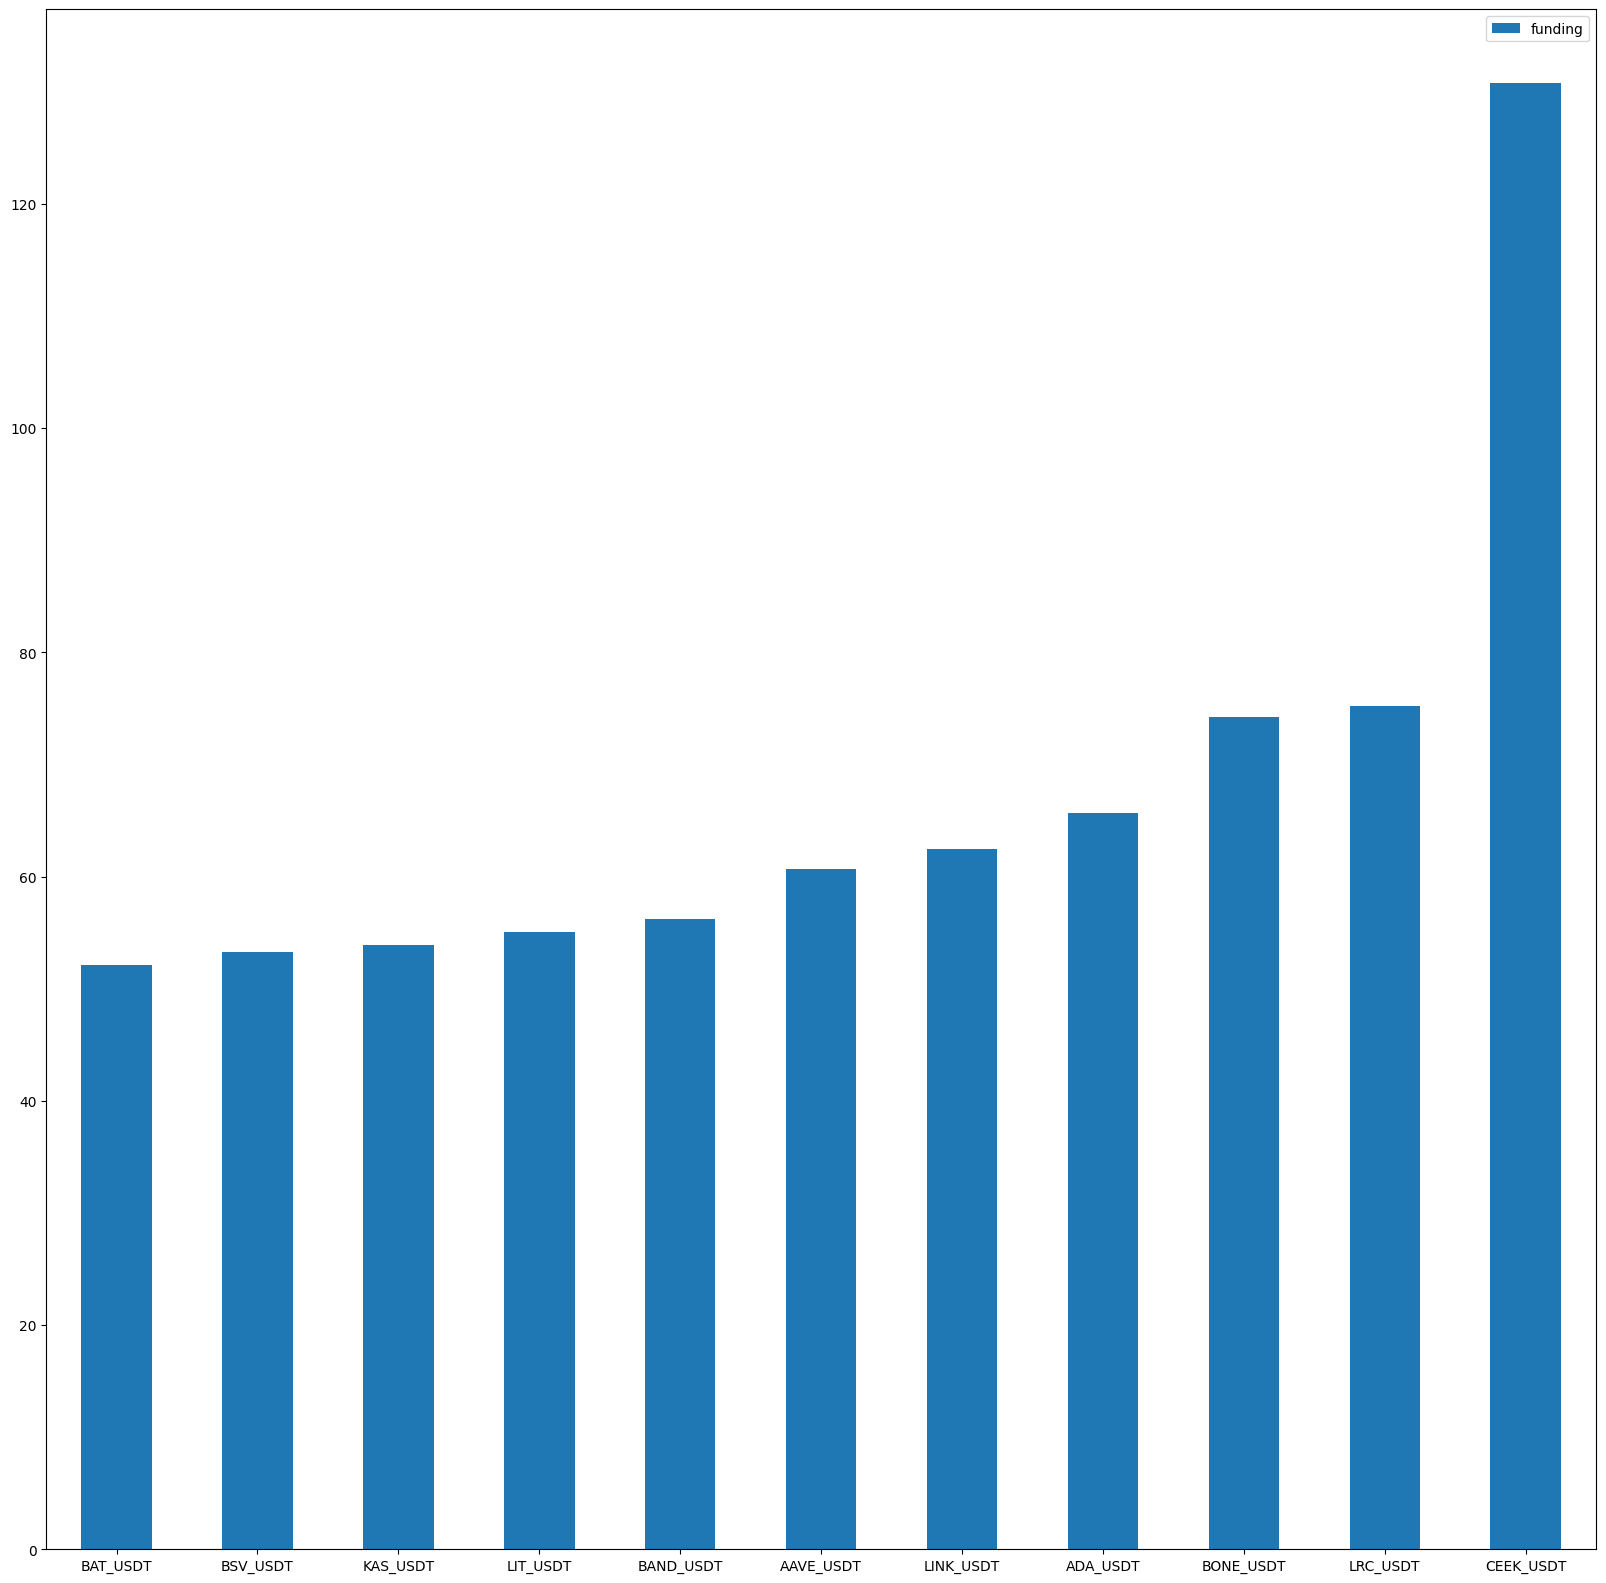

In [19]:
plt = filtered_return[filter2 == True].sort_values().to_frame(name='funding')
new = return1D[list(plt.index)].copy()
counterChangeNegToPosFunding = ((new > 0).astype(int).diff() > 0).sum()
print('how many times the funding rate change side(from + to -): ')
print(counterChangeNegToPosFunding)
ax = plt.plot.bar(y='funding', rot=0, figsize=(20,20))

In [20]:
returnFunding = return1D['CEEK_USDT'].sum()
meanPayment = return1D['CEEK_USDT'].mean()
return1D['CEEK_USDT'].mean()

0.12147418755803159